# Calculate price-equilibrium using simulations

In [1]:
import sys, numpy as np, scipy
from sympy import symbols
from typing import Callable
from log_progress import log_progress
np.random.seed(None)

import matplotlib.pyplot as plt, mpld3
%matplotlib inline
mpld3.enable_notebook()  # to zoom and move in plots

resetSize,r,zmin,zmax,beta,D,L,Supply = symbols('a r  z_{\min} z_{\max} \\beta \\Delta \\ell \\tau', positive=True,finite=True,real=True)
params = {
    L: 10,           # total transfers per pair per day.
    D: 6,            # delta transfers per day (Alice-to-Bob minus Bob-to-Alice) in the asymmetric case.
    beta: 0.01,      # value / transfer-size
    r: 4/100/365,    # interest rate per day
    resetSize: 1.1,  # records per reset tx
    Supply: 288000,  # records per day
    zmin: 0.001,     # min transfer size in bitcoins (for power law distribution)
    zmax: 1,         # max transfer size in bitcoins (for uniform distribution)
}
# NOTE: These are the same params used in the symbolic comnputations (market-equilibrium notebook).

In [2]:
if "Simulation" in sys.modules: del sys.modules["Simulation"]
from Simulation import *
sim = PowerlawSymmetricSimulation(params, numOfDays=1000, filenamePrefix="interpolation-tables/powerlaw-symmetric-1000days") 
# You can also try the following options:
#sim = PowerlawAsymmetricSimulation(params, numOfDays=1000, filenamePrefix="interpolation-tables/powerlaw-asymmetric-1000days")
#sim = UniformSymmetricSimulation(params, numOfDays=1000, filenamePrefix="interpolation-tables/uniform-symmetric-1000days")
#sim = UniformAsymmetricSimulation(params, numOfDays=1000, filenamePrefix="interpolation-tables/uniform-asymmetric-1000days")

sim.loadTables()

Simulation.py version 1.0


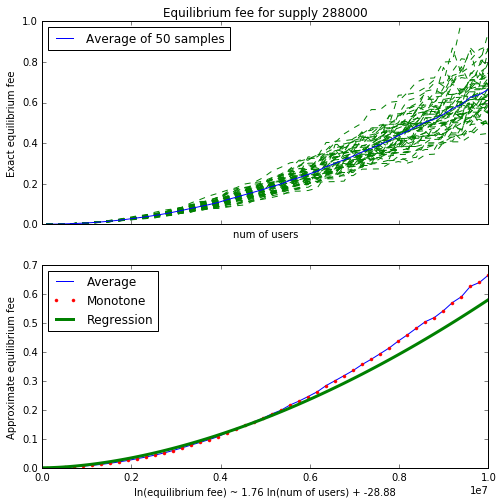

In [3]:
supply = params[Supply]
sim.calculateEquilibriumBlockchainFeeTable(
    numOfDays=1000, 
    numsOfUsers=np.linspace(100000,10000000,50), 
    supply=supply, 
    numOfSamples=50, 
    recreateAllSamples=False)
sim.saveTables()
sim.plotEquilibriumBlockchainFeeTable(supply)

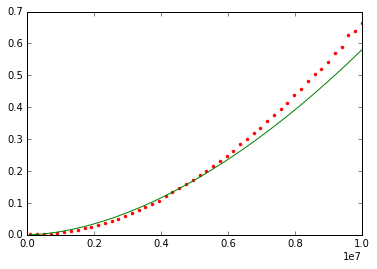

In [19]:
table=sim.equilibriumBlockchainFeeTables[supply]
xs = table.xValues
ys = table.yValuesAverage

### Log-log regression:
regressionCoeffs = np.polyfit(np.log(xs), np.log(ys), 1)
regressionFunction = lambda x:  regressionCoeffs[0]*x**1 + regressionCoeffs[1]#*x + regressionCoeffs[2]
plt.plot(xs, ys, 'r.')
plt.plot(xs, np.exp(regressionFunction(np.log(xs))), 'g')

6.33e-15 n^2 + 4.36e-09 n + -4.67e-03


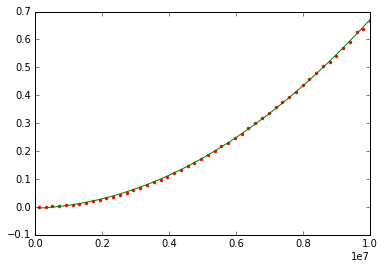

In [26]:
### Lin-lin regression, higher power:
regressionCoeffs = np.polyfit(xs, ys, 2)
regressionString = "{:.2e} n^2 + {:.2e} n + {:.2e}".format(*regressionCoeffs)
print (regressionString)
regressionFunction = lambda x:  regressionCoeffs[0]*x**2 + regressionCoeffs[1]*x + regressionCoeffs[2]
plt.plot(xs, ys, 'r.')
plt.plot(xs, regressionFunction(xs), 'g')

[ -4.78895629e+04   2.60676775e-01]


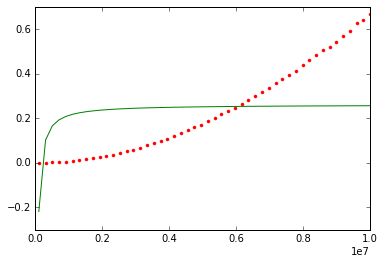

In [18]:
### Lin-lin regression of 1/x: 
regressionCoeffs = np.polyfit(1/xs, ys, 1)
print(regressionCoeffs)
regressionFunction = lambda x:  regressionCoeffs[0]*x**1 + regressionCoeffs[1]#*x + regressionCoeffs[2]
plt.plot(xs, ys, 'r.')
plt.plot(xs, regressionFunction(1/xs), 'g')